<div id="c-s-hlist">
    <ul>
        <li><a href="#intro">Intro</a></li>
        <li><a href="#import-data">Import Data</a></li>
        <li><a href="#preprocessing-data">Pre-Processing of Data</a></li>
        <li><a href="#finding-k">Finding Optimal Number of Cluster</a>
        </li><li><a href="#k-mean">Apply K-means clustering</a></li>
        <li><a href="#closing-words">Closing Words</a></li>
    </ul>
</div>

<h2 id="intro"> Intro </h2>

&emsp; This challenge will cluster Instagram visits with K-means. That groups users based on their visit scores. K-means clustering can help us to group data by clustering data with the nearest rank, which will cluster as the same group. That we can reduce the time of manual grouping if the data is very large. And this dataset from <a href='https://www.kaggle.com/datasets/chaandsheikh/instagram-visit-clustering' target="_blank">https://www.kaggle.com/datasets/chaandsheikh/instagram-visit-clustering</a>

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h2 id="import-data"> Import Data </h2>

In [113]:
data = pd.read_csv('Instagram visits clustering.csv')

In [114]:
data.head(20)

,User ID,Instagram visit score,Spending_rank(0 to 100)
0,0,63,24.050708
1,1,61,25.223290
2,2,104,18.528245
3,3,82,86.890232
4,4,14,31.492397
5,5,74,81.195314
6,6,83,88.119729
7,7,71,87.468356
8,8,42,80.829564
9,9,79,25.966622


In [115]:
data = data.sample(frac = 1) 

<h2 id="preprocessing-data"> Pre-Processing of Data </h2>

&emsp; Because from the dataset we have a duplicate user ID as the index of the dataset, we need to extract them before using clustering.

In [116]:
X = data.iloc[:, [1, 2]].values

In [117]:
X[:10]

array([[ 22.        ,  25.42124007],
       [104.        ,  18.52824526],
       [ 40.        ,  53.73012227],
       [ 14.        ,  24.68949391],
       [ 95.        ,   3.77676764],
       [ 93.        ,  19.57925395],
       [ 36.        ,  23.46131302],
       [ 75.        ,  84.07299429],
       [ 98.        ,  23.00398013],
       [ 80.        , 107.3498213 ]])

<h2 id="finding-k"> Finding Optimal Number of Cluster </h2>

&emsp; Before we cluster data, we need to estimate the number of optimal clusters (groups, classes, etc.), or alias K, that is using the elbow method for finding the optimal number of K.

In [118]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

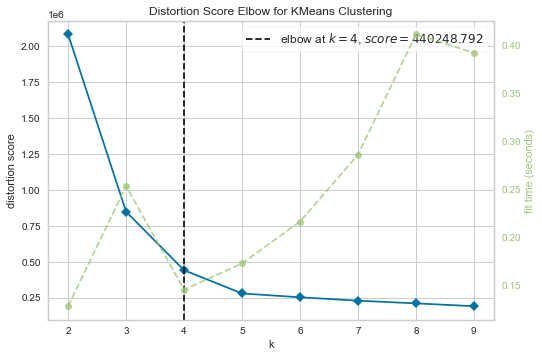

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [119]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

So, The optimal K value is the point at which the graph forms an elbow. That in this dataset are k = 4.

<h2 id="k-mean"> Apply K-means clustering </h2>

In [120]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

In [121]:
kmeans.labels_

array([2, 0, 3, ..., 3, 1, 0])

In [122]:
y = kmeans.predict(X)

In [123]:
y[:200]

array([2, 0, 3, 2, 0, 0, 2, 1, 0, 1, 0, 1, 1, 0, 0, 3, 0, 1, 1, 1, 2, 3,
       0, 0, 2, 2, 2, 3, 1, 1, 0, 1, 1, 0, 2, 3, 0, 0, 0, 0, 1, 3, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 2, 3, 0, 1, 1, 1, 3, 1, 1, 2, 0, 2, 1, 2, 3,
       0, 0, 0, 3, 2, 0, 3, 3, 2, 1, 0, 0, 2, 3, 3, 2, 1, 1, 0, 2, 2, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 1, 3, 0, 0, 1, 1, 1,
       0, 3, 0, 3, 2, 0, 3, 1, 0, 2, 0, 1, 1, 2, 0, 0, 0, 2, 2, 1, 2, 1,
       0, 2, 1, 2, 2, 0, 2, 0, 3, 3, 0, 1, 0, 1, 0, 2, 1, 3, 1, 0, 2, 0,
       0, 0, 2, 2, 0, 0, 0, 2, 0, 3, 1, 3, 1, 0, 1, 1, 2, 2, 0, 2, 1, 3,
       0, 0, 0, 2, 3, 1, 0, 1, 3, 0, 1, 2, 1, 1, 0, 0, 1, 2, 3, 3, 0, 3,
       0, 1])

So after using K-means to predict a cluster, we can visualize how a cluster can be clustered as below:

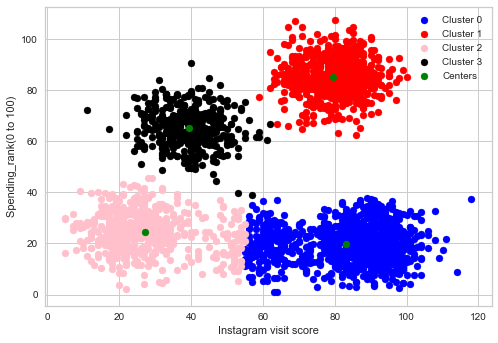

In [124]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Cluster 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Cluster 1')
plt.scatter(X[y == 2, 0], X[y == 2, 1], c='pink', label='Cluster 2')
plt.scatter(X[y == 3, 0], X[y == 3, 1], c='black', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c='green', label='Centers')
plt.xlabel('Instagram visit score')
plt.ylabel('Spending_rank(0 to 100)')
plt.legend()
plt.show()

For example, the cluster below is cluster 3, and we could see that there were a number of users in this cluster. In the same way, other nth clusters we also do like this.

In [132]:
data.iloc[y == 3]

,User ID,Instagram visit score,Spending_rank(0 to 100)
2238,2238,40,53.730122
1944,1944,44,59.237125
916,916,33,63.690398
1021,1021,31,59.628665
748,748,38,68.109601
...,...,...,...
1842,1842,32,61.405270
2072,2072,25,60.739357
236,236,31,62.486815
589,589,43,64.301579


<h2 id="closing-words"> Closing Words</h2>

&emsp; K-Means clustering not only helps us understand the natural groupings within the data but also allows us to adapt these clusters for various applications beyond just in this challence. By using the clusters, we can group a same personalize user experiences, optimize marketing strategies, and etc.

&emsp; If you found this challenge helpful, feel free to share it. Don’t forget to check out my other projects for more coding inspiration. Enjoy reading!